# Career Agent Workflow Visualization

This notebook demonstrates the internal workflow of the Career Agent system using LangGraph visualization capabilities.

## Overview
The Career Agent uses a multi-node workflow to process resumes and provide career guidance:
1. **Input Processing** - Parse resume/GitHub data
2. **Skill Profiling** - Extract and categorize skills
3. **Learning Path Generation** - Create personalized learning roadmaps
4. **Portfolio Building** - Suggest relevant projects
5. **Mentor Matching** - Find suitable mentors

In [11]:
# Import required libraries
import sys
import os
import json
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import Image, display, HTML
import pandas as pd
import seaborn as sns
import numpy as np

# Set up the path to import our modules
sys.path.append('.')

# Import our career agent modules
from graph import (
    build_career_workflow, 
    get_career_graph, 
    quick_skill_analysis_workflow,
    full_career_development_workflow
)
from common import (
    CareerAgentState, 
    enhanced_resume_analysis_workflow,
    parse_resume_text
)

print(" All imports successful!")
print(" Ready to visualize Career Agent workflow")

 All imports successful!
 Ready to visualize Career Agent workflow


In [10]:

# Build the raw (uncompiled) graph
career_graph = build_career_workflow()

print("\n Career workflow successfully built!")
print(" Nodes:", list(career_graph.nodes.keys()))

# Attempt multiple visualization methods in order of availability
def visualize_graph(graph):
    """Try multiple visualization methods for a LangGraph StateGraph."""
    print("\n Attempting to visualize the workflow graph...\n")

    #  Try Mermaid text (always works)
    try:
        mermaid_text = graph.draw_mermaid()
        print(" Mermaid diagram generated below (copy to https://mermaid.live to view):\n")
        print(mermaid_text)
        return
    except Exception as e:
        print(" Mermaid rendering not available:", e)

    #  Try Graphviz PNG rendering
    try:
        dot = graph.draw_dot()
        with open("career_graph.dot", "w") as f:
            f.write(dot)
        os.system("dot -Tpng career_graph.dot -o career_graph.png")
        display(Image("career_graph.png"))
        print(" PNG visualization generated via Graphviz!")
        return
    except Exception as e:
        print(" Graphviz visualization not available:", e)

    #  Fallback: networkx diagram (always works if matplotlib installed)
    try:
        print(" Falling back to simple NetworkX layout...")
        G = nx.DiGraph()

        # Add nodes and edges manually
        for node in graph.nodes.keys():
            G.add_node(node)
        for src, dests in graph.edges.items():
            for dest in dests:
                G.add_edge(src, dest)

        # Draw graph
        plt.figure(figsize=(8, 6))
        pos = nx.spring_layout(G, seed=42)
        nx.draw(G, pos, with_labels=True, node_color='skyblue',
                node_size=2000, font_size=10, font_weight='bold',
                arrows=True, arrowstyle='-|>', arrowsize=15)
        plt.title("Career Workflow Graph", fontsize=14)
        plt.show()

        print(" NetworkX visualization rendered successfully!")
    except Exception as e:
        print(" Could not visualize graph in any form:", e)

# Call the function
visualize_graph(career_graph)



 Career workflow successfully built!
 Nodes: ['input_processor', 'skill_profiler', 'learning_path_generator', 'portfolio_builder', 'mentor_matcher']

 Attempting to visualize the workflow graph...

 Mermaid rendering not available: 'StateGraph' object has no attribute 'draw_mermaid'
 Graphviz visualization not available: 'StateGraph' object has no attribute 'draw_dot'
 Falling back to simple NetworkX layout...
 Could not visualize graph in any form: 'set' object has no attribute 'items'



 Career workflow successfully built!
Nodes: ['input_processor', 'skill_profiler', 'learning_path_generator', 'portfolio_builder', 'mentor_matcher']

 Attempting to visualize the workflow graph...



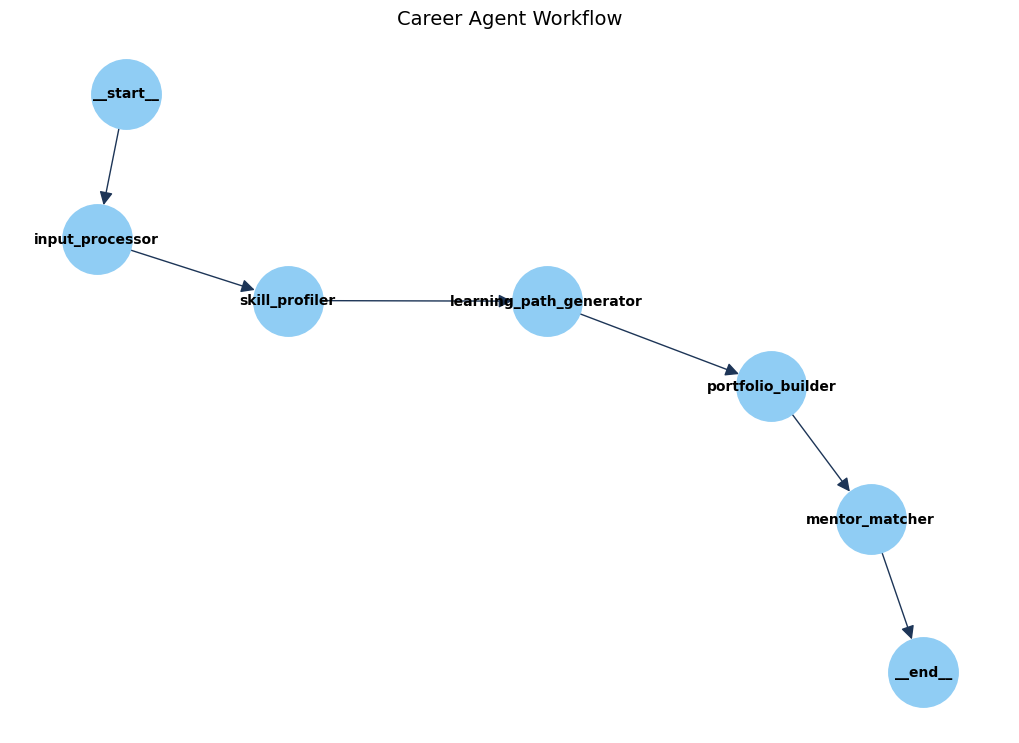

 NetworkX visualization rendered successfully!


In [9]:
# ======================================================
# Step 2: Build and Visualize the Career Workflow
# ======================================================

# Build the raw (uncompiled) graph
career_graph = build_career_workflow()

print("\n Career workflow successfully built!")
print("Nodes:", list(career_graph.nodes.keys()))

# --- Visualization Utility ---
def visualize_graph(graph):
    """Robust visualization for LangGraph StateGraph (any version)."""
    print("\n Attempting to visualize the workflow graph...\n")

    try:
        # Create a directed graph
        G = nx.DiGraph()

        # Add nodes
        for node in graph.nodes.keys():
            G.add_node(node)

        # Add edges (handle both dict and set formats)
        edges = graph.edges
        if isinstance(edges, dict):
            for src, dests in edges.items():
                for dest in dests:
                    G.add_edge(src, dest)
        elif isinstance(edges, (set, list, tuple)):
            for edge in edges:
                if isinstance(edge, (tuple, list)) and len(edge) == 2:
                    G.add_edge(edge[0], edge[1])

        # Draw using NetworkX
        plt.figure(figsize=(10, 7))
        pos = nx.spring_layout(G, seed=42)
        nx.draw(G, pos, with_labels=True, node_color='#90cdf4', 
                node_size=2500, font_size=10, font_weight='bold',
                edge_color='#1d3557', arrowsize=20)
        plt.title("Career Agent Workflow", fontsize=14)
        plt.axis("off")
        plt.show()

        print(" NetworkX visualization rendered successfully!")

    except Exception as e:
        print(" Visualization failed:", e)


# --- Run Visualization ---
visualize_graph(career_graph)
